<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS6: Respuesta en frecuencia de Filtros Pasivos RLC 

**Alumnas:** María Victoria Poric y Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica    
**Materia:** Análisis y Procesamiento de Señales    
**Fecha:** Octubre 2025 

## Consigna

Considerando el siguiente circuito:

<img src="bicuad_pasivo.png" width="300"/><br><br>

1) Demostrar que la función transferencia $T(s) = \frac{V_2 (s)}{V_1 (s)}$ se corresponde con una sección bicuadrática (SOS) $\rightarrow$ $T(s) = k \cdot \frac{s^2 + s \cdot \frac{\omega_{0Z}}{Q_Z} + \omega_{0Z}^2}{s^2 + s \cdot \frac{\omega_{0P}}{Q_P} + \omega_{0P}^2}$
   
2) Parametrizar los polinomios de segundo orden, hallando los parámetros $k$, $\omega_{0P}$, $Q_Z$, $\omega_{0P}$ y $Q_P$ en función de los elementos de la red.

3) Para cada función, utilizar la red bicuadrática para implementarla:
- $T_1 (s) = \frac{s^2 + 9}{s^2 + s \sqrt{2} + 1}$
  
- $T_2 (s) = \frac{s^2 + \frac{1}{9}}{s^2 + s \frac{1}{5} + 1}$

- $T_3 (s) = \frac{s^2 + s \frac{1}{5} + 1}{s^2 + s \sqrt{2} + 1}$

4) Dibujar el diagrama de polos y ceros de $T(s)$. Indicar la localización de polos y ceros en función de los parámetros.
   
5) Calcular y graficar la respuesta de módulo y fase, indicando la respuesta asintótica donde corresponda.

*Bonus*:
- ¿Cómo se podrían conectar en cascada $T_1 (s)$ y $T_2 (s)$?¿Qué respuesta sería la resultante?
- Simular las redes en LTSpice.

## Introducción
En el estudio de los sistemas lineales e invariantes en el tiempo (LTI), los circuitos eléctricos pueden describirse mediante funciones de transferencia que relacionan las variables de salida y entrada en el dominio de Laplace. Si un circuito tiene una señal de entrada $V_1 (s)$ y una señal de salida $V_2 (s)$, la función de transferencia se define como:
$$
T(s) = \frac{V_2 (s)}{V_1 (s)}\tag{1}
$$
bajo la hipótesis de condiciones iniciales nulas.
Esta función describe completamente el comportamiento dinámico del sistema, permitiendo analizar su estabilidad, su respuesta en frecuencia y su tipo de filtrado (pasa bajos, pasa altos, pasa banda, etc.).

En general, una función de transferencia puede expresarse como el cociente entre dos polinomios en $s$:
$$
T(s) = \frac{C(s)}{D(s)} = \frac{b_m s^m + b_{m-1}s^{m-1} + \cdots + b_0}{a_n s^n + a_{n-1}s^{n-1} + \cdots + a_0}
$$

Los ceros del sistema son las raíces del numerador $C(s) = 0$, mientras que los polos corresponden a las raíces del denominador $D(s) = 0$. La posición de estos polos y ceros determina tanto la estabilidad como la forma espectral de la respuesta. Los polos ubicados en el semiplano izquierdo del plano $s$, es decir, tienen parte real negativa, garantizan una respuesta estable, y los ceros próximos al eje imaginario generan atenuaciones en determinadas frecuencias.

Dentro de esta formulación general, un caso particularmente importante es el de las funciones de segundo orden, también llamadas secciones bicuadráticas o SOS (Second Order Sections). Estas funciones aparecen de forma natural al analizar filtros analógicos implementados con redes RLC o circuitos activos equivalentes, y pueden escribirse de manera normalizada como:
$$
T(s) = k \cdot \frac{s^2 + \dfrac{\omega_{0Z}}{Q_Z}s + \omega_{0Z}^2}{s^2 + \dfrac{\omega_{0P}}{Q_P}s + \omega_{0P}^2}\tag{2}
$$

En esta expresión, el parámetro $k$ representa la ganancia en continua o el factor de escala de amplitud; $\omega_{0Z}$ y $\omega_{0P}$ son las frecuencias naturales asociadas a los ceros y polos; y $Q_Z$ y $Q_P$ son los factores de calidad correspondientes. Estos últimos indican el nivel de amortiguamiento del sistema: un valor alto de $Q$ implica una respuesta más selectiva o resonante, mientras que valores bajos corresponden a un comportamiento más amortiguado.

La variable $s = \sigma + j \omega$ combina el eje real (amortiguamiento) y el eje imaginario (frecuencia). 

El significado físico de estos parámetros se entiende mejor observando la forma de los polos y ceros en el plano complejo. Para una función de segundo orden, las raíces del numerador y denominador pueden escribirse como:

\begin{aligned}
s_{Z_{1,2}} &= -\frac{\omega_{0Z}}{2Q_Z}\pm j\,\omega_{0Z}\sqrt{1 - \frac{1}{4Q_Z^2}} \\
s_{P_{1,2}} &= -\frac{\omega_{0P}}{2Q_P}\pm j\,\omega_{0P}\sqrt{1 - \frac{1}{4Q_P^2}}
\end{aligned}

Cada par de raíces complejas conjugadas define un círculo de radio $\omega_0$ alrededor del origen, y su desplazamiento hacia el eje real depende del factor $Q$. Los polos cercanos al eje imaginario generan picos de resonancia, mientras que los ceros pueden anular la respuesta en ciertas frecuencias, configurando así diferentes tipos de filtros: pasa bajos, pasa altos, pasa banda o rechazo de banda.

Para estudiar el comportamiento frecuencial del sistema, se evalúa la función de transferencia sobre el eje imaginario, reemplazando $s = j \omega$. Esto conduce a la respuesta en frecuencia:
$$
T(j\omega) = T(s)\big|_{s=j\omega}\tag{3}
$$

de la cual se obtiene tanto el módulo $|T(j \omega)|$, que indica la ganancia o atenuación en función de la frecuencia, como la fase $ \angle T(j \omega)$, que describe el desfase entre entrada y salida. La representación gráfica de estas funciones permite caracterizar completamente la respuesta del sistema y analizar su comportamiento asintótico a bajas y altas frecuencias.

De esta forma, la descripción de un circuito mediante una función de transferencia bicuadrática permite relacionar directamente sus componentes físicos con los parámetros dinámicos ($k$, $\omega_0$, $Q$), interpretar su estabilidad y predecir su respuesta en frecuencia a partir de la localización de polos y ceros.

El objetivo de este trabajo es aplicar los conceptos anteriores para analizar y parametrizar distintas funciones de transferencia bicuadráticas, identificando sus polos, ceros y parámetros característicos, representarlas en el plano complejo y estudiar su respuesta en frecuencia mediante herramientas analíticas y computacionales.

## Análisis y desarrollo
En primer lugar, se analizó el circuito propuesto en el dominio de Laplace. Para ello, se tomaron los siguientes tres componentes y se obtuvo su impedancia equivalente $Z_{eq1}$:

<img src="imp_eq_1.png" width="300"/><br><br>

Como están en paralelo, se utilizaron sus admitancias, pues la admitancia total es igual a la suma de las admitancias individuales. De esta forma,

$$
Y_{L1}(s) = \frac{b}{sL}
$$
$$
Y_{R1}(s) = \frac{d}{R}
$$
$$
Y_{C1}(s) = sCa
$$

Así, 
$$
Y_{total 1}(s) = Y_{L1}(s) + Y_{R1}(s) + Y_{C1}(s) = \frac{b}{sL} + \frac{d}{R} + sCa
$$

Empleando la relación $Y(s) = \frac{1}{Z(s)}$, se obtuvo la impedancia equivalente de estos tres componentes:

$$
Y_{total 1}(s) = \frac{1}{Z_{eq1}(s)} \quad \Rightarrow \quad Z_{eq1}(s) = \frac{1}{Y_{total 1}(s)} = \frac{1}{\frac{b}{sL} + \frac{d}{R} + sCa}\tag{4}
$$

Luego, tomando los siguientes tres componentes:

<img src="imp_eq_2.png" width="300"/><br><br>

Se realizó el mismo procedimiento utilizando sus admitancias, dado que están en paralelo, para obtener su impedancia equivalente $Z_{eq2}$:
$$
Y_{L2}(s) = \frac{(1-b)}{sL}
$$
$$
Y_{R2}(s) = \frac{(1-d)}{R}
$$
$$
Y_{C2}(s) = sC(1-a)
$$

Así, 
$$
Y_{total 2}(s) = Y_{L2}(s) + Y_{R2}(s) + Y_{C2}(s) = \frac{(1-b)}{sL} + \frac{(1-d)}{R} + sC(1-a)
$$

La impedancia equivalente de estos tres componentes es:
$$
Z_{eq2}(s) = \frac{1}{Y_{total 2}(s)} = \frac{1}{\frac{(1-b)}{sL} + \frac{(1-d)}{R} + sC(1-a)}\tag{5}
$$

De esta forma, se obtiene un circuito de la siguiente manera:

<img src="circ_1.png" width="300"/><br><br>


Para determinar la relación entre la tensión de salida y la tensión de entrada se aplicó el divisor de tensión. Para que este método sea válido, se consideró que la corriente que circula hacia la salida es nula $(i_2 = 0)$. Esta suposición implica que la carga conectada en el nodo de salida tiene una impedancia muy alta (idealmente infinita), por lo que no afecta el reparto de tensiones en el circuito.

Se obtuvo, 
$$
i_1 = \frac{V_1}{Z_{eq1} + Z_{eq2}} \tag{6}
$$
$$
V_2 = i_1 \cdot Z_{eq2} \tag{7}
$$

Reemplazando en (7) por (6):
$$
V_2 = \frac{V_1}{Z_{eq1} + Z_{eq2}} \cdot Z_{eq2} \quad \Rightarrow \quad \frac{V_2}{V_1} = \frac{Z_{eq2}}{Z_{eq1} + Z_{eq2}} \tag{8}
$$

Reemplazando en (8) por lo obtenido en (4) y (5), se llega a la expresión para la función de transferencia:
$$
T(s) = \frac{V_2}{V_1} = \frac{\left[\frac{1}{\frac{(1-b)}{sL} + \frac{(1-d)}{R} + sC(1-a)}\right]}{\left[\frac{1}{\frac{b}{sL} + \frac{d}{R} + sCa}\right] + \left[\frac{1}{\frac{(1-b)}{sL} + \frac{(1-d)}{R} + sC(1-a)}\right]}
$$

Analizando el numerador se llega a:
$$
\frac{1}{\frac{(1-b)}{sL} + \frac{(1-d)}{R} + sC(1-a)} = \frac{1}{\frac{R(1-b) + sL(1-d) + sLRsC(1-a)}{sLR}} = \frac{sLR}{R(1-b) + sL(1-d) + s^2 LRC(1-a)}
$$

Analizando el primer corchete del denominador:
$$
\left[\frac{1}{\frac{b}{sL} + \frac{d}{R} + sCa} \right] = \frac{1}{\frac{bR + dsL + sLRsCa}{sLR}} = \frac{sLR}{bR + dsL + s^2 LRCa}
$$

Como el segundo corchete queda igual al numerador, en el denominador se obtiene:
$$
\frac{sLR}{bR + dsL + s^2 LRCa} + \frac{sLR}{R(1-b) + sL(1-d) + s^2 LRC(1-a)}
$$

Haciendo denominador común y simplificando:
$$
\frac{sLR \left(R(1-b) + sL(1-d) + s^2 LRC(1-a)\right) + sLR \left(bR + sdL + s^2 LRCa \right)}{\left(bR + sdL + s^2 LRCa \right) \left(R(1-b) + sL(1-d) + s^2 LRC(1-a) \right)} =
$$

$$
\frac{sLR \left(R - bR + sL - sdL + s^2 LRC - s^2 LRCa + bR + sdL + s^2 LRCa\right)}{\left(bR + sdL + s^2 LRCa \right) \left(R(1-b) + sL(1-d) + s^2 LRC(1-a) \right)} =
$$

$$
\frac{sLR \left(R + sL + s^2 LRC \right)}{\left(bR + sdL + s^2 LRCa \right) \left(R(1-b) + sL(1-d) + s^2 LRC(1-a) \right)}
$$

Entonces, la función de transferencia se expresa como:
$$
T(s) = \frac{\left[\frac{sLR}{R(1-b) + sL(1-d) + s^2 LRC(1-a)} \right]}{\left[\frac{sLR \left(R + sL + s^2 LRC \right)}{\left(bR + sdL + s^2 LRCa \right) \left(R(1-b) + sL(1-d) + s^2 LRC(1-a) \right)} \right]} =
$$

Reorganizando, queda:
$$
T(s) = \frac{LRCa s^2 + dL s + bR}{LRC s^2 + L s + R}
$$

Finalmente, sacando factor común $LRCa$ en el numerador y $LRC$ en el denominador,
$$
T(s) = \frac{LRCa \left(s^2 + \frac{dL}{LRCa} s + \frac{bR}{LRCa} \right)}{LRC \left( s^2 + \frac{L}{LRC} s + \frac{R}{LRC} \right)} = \frac{a \left( s^2 + \frac{d}{RCa} s + \frac{b}{LCa} \right)}{s^2 + \frac{1}{RC} s + \frac{1}{LC}}\tag{9}
$$

Se llega a una expresión con igual estructura que (2):
$$
T(s) = k \cdot \frac{s^2 + \dfrac{\omega_{0Z}}{Q_Z}s + \omega_{0Z}^2}{s^2 + \dfrac{\omega_{0P}}{Q_P}s + \omega_{0P}^2} = \frac{a \left( s^2 + \frac{d}{RCa} s + \frac{b}{LCa} \right)}{s^2 + \frac{1}{RC} s + \frac{1}{LC}}
$$

A partir de lo encontrado en (9) y tomando (2) es posible definir los parámetros $k$, $\omega_{0Z}$, $Q_Z$, $\omega_{0P}$ y $Q_P$:

- $k = a$
  
- $\omega_{0Z}^2 = \frac{b}{LCa} \quad \Rightarrow \quad \omega_{0Z} = \sqrt{\frac{b}{LCa}}$

- $\frac{\omega_{0Z}}{Q_Z} = \frac{d}{RCa} \quad \Rightarrow \quad Q_Z = \frac{R}{d} \sqrt{\frac{Cab}{L}}$

- $\omega_{0P}^2 = \frac{1}{LC} \quad \Rightarrow \quad \omega_{0P} = \sqrt{\frac{1}{LC}}$

- $\frac{\omega_{0P}}{Q_P} = \frac{1}{RC} \quad \Rightarrow \quad Q_P = R \sqrt{\frac{C}{L}}$


Luego, se procedió con la implementación de redes bicuadráticas. 

- $T_1(s) = \frac {s^2 + 9}{s^2 + \sqrt{2}s + 1}$
  
- $T_2(s) = \frac {s^2 + 1/9}{s^2 + s 1/5 + 1}$

- $T_3(s) = \frac {s^2 + s 1/5 + 1}{s^2 + s \sqrt{2} + 1}$

Donde el objetivo fue encontrar los valores de los parámetros a, b y c según la parametrización obtenida previamente. Para el $T_1(s)$: 

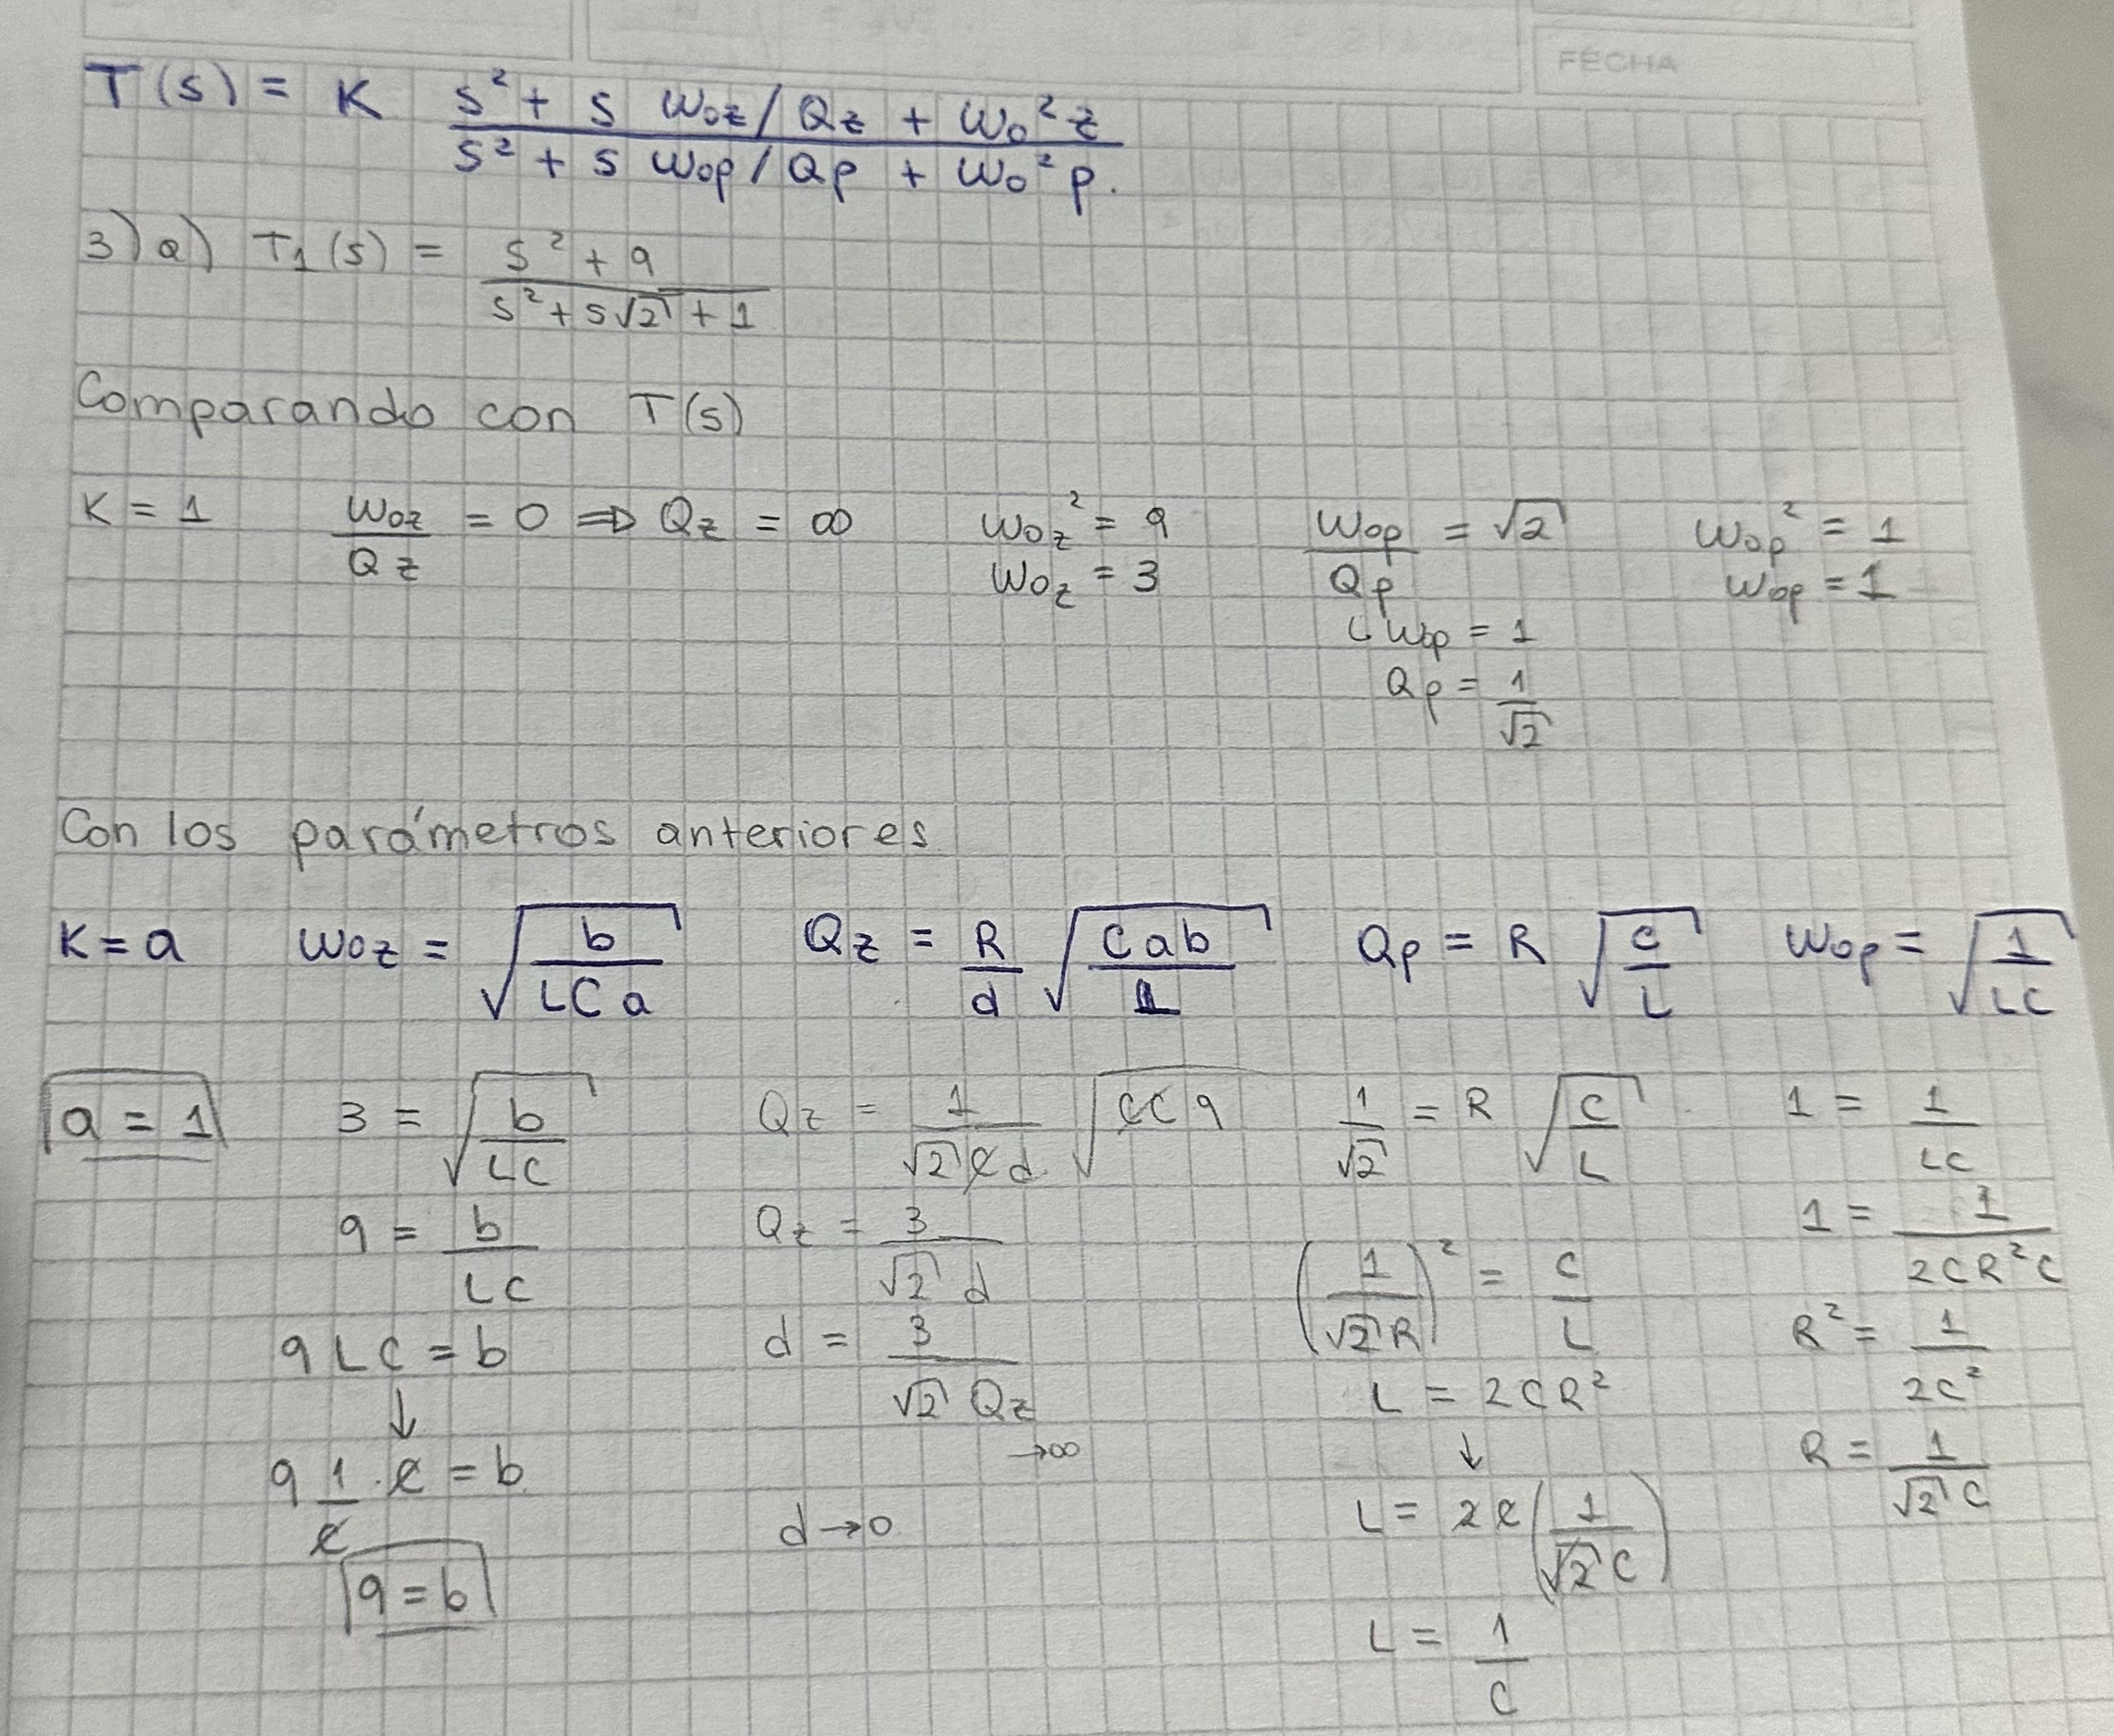

In [18]:
from IPython.display import Image, display
display(Image(filename="3_trans_1.jpeg"))

De donde se obtienen los siguientes valores: 

- $a = 1$
  
- $b = 9$

- $d = 0$

Para el $T_2(s)$:

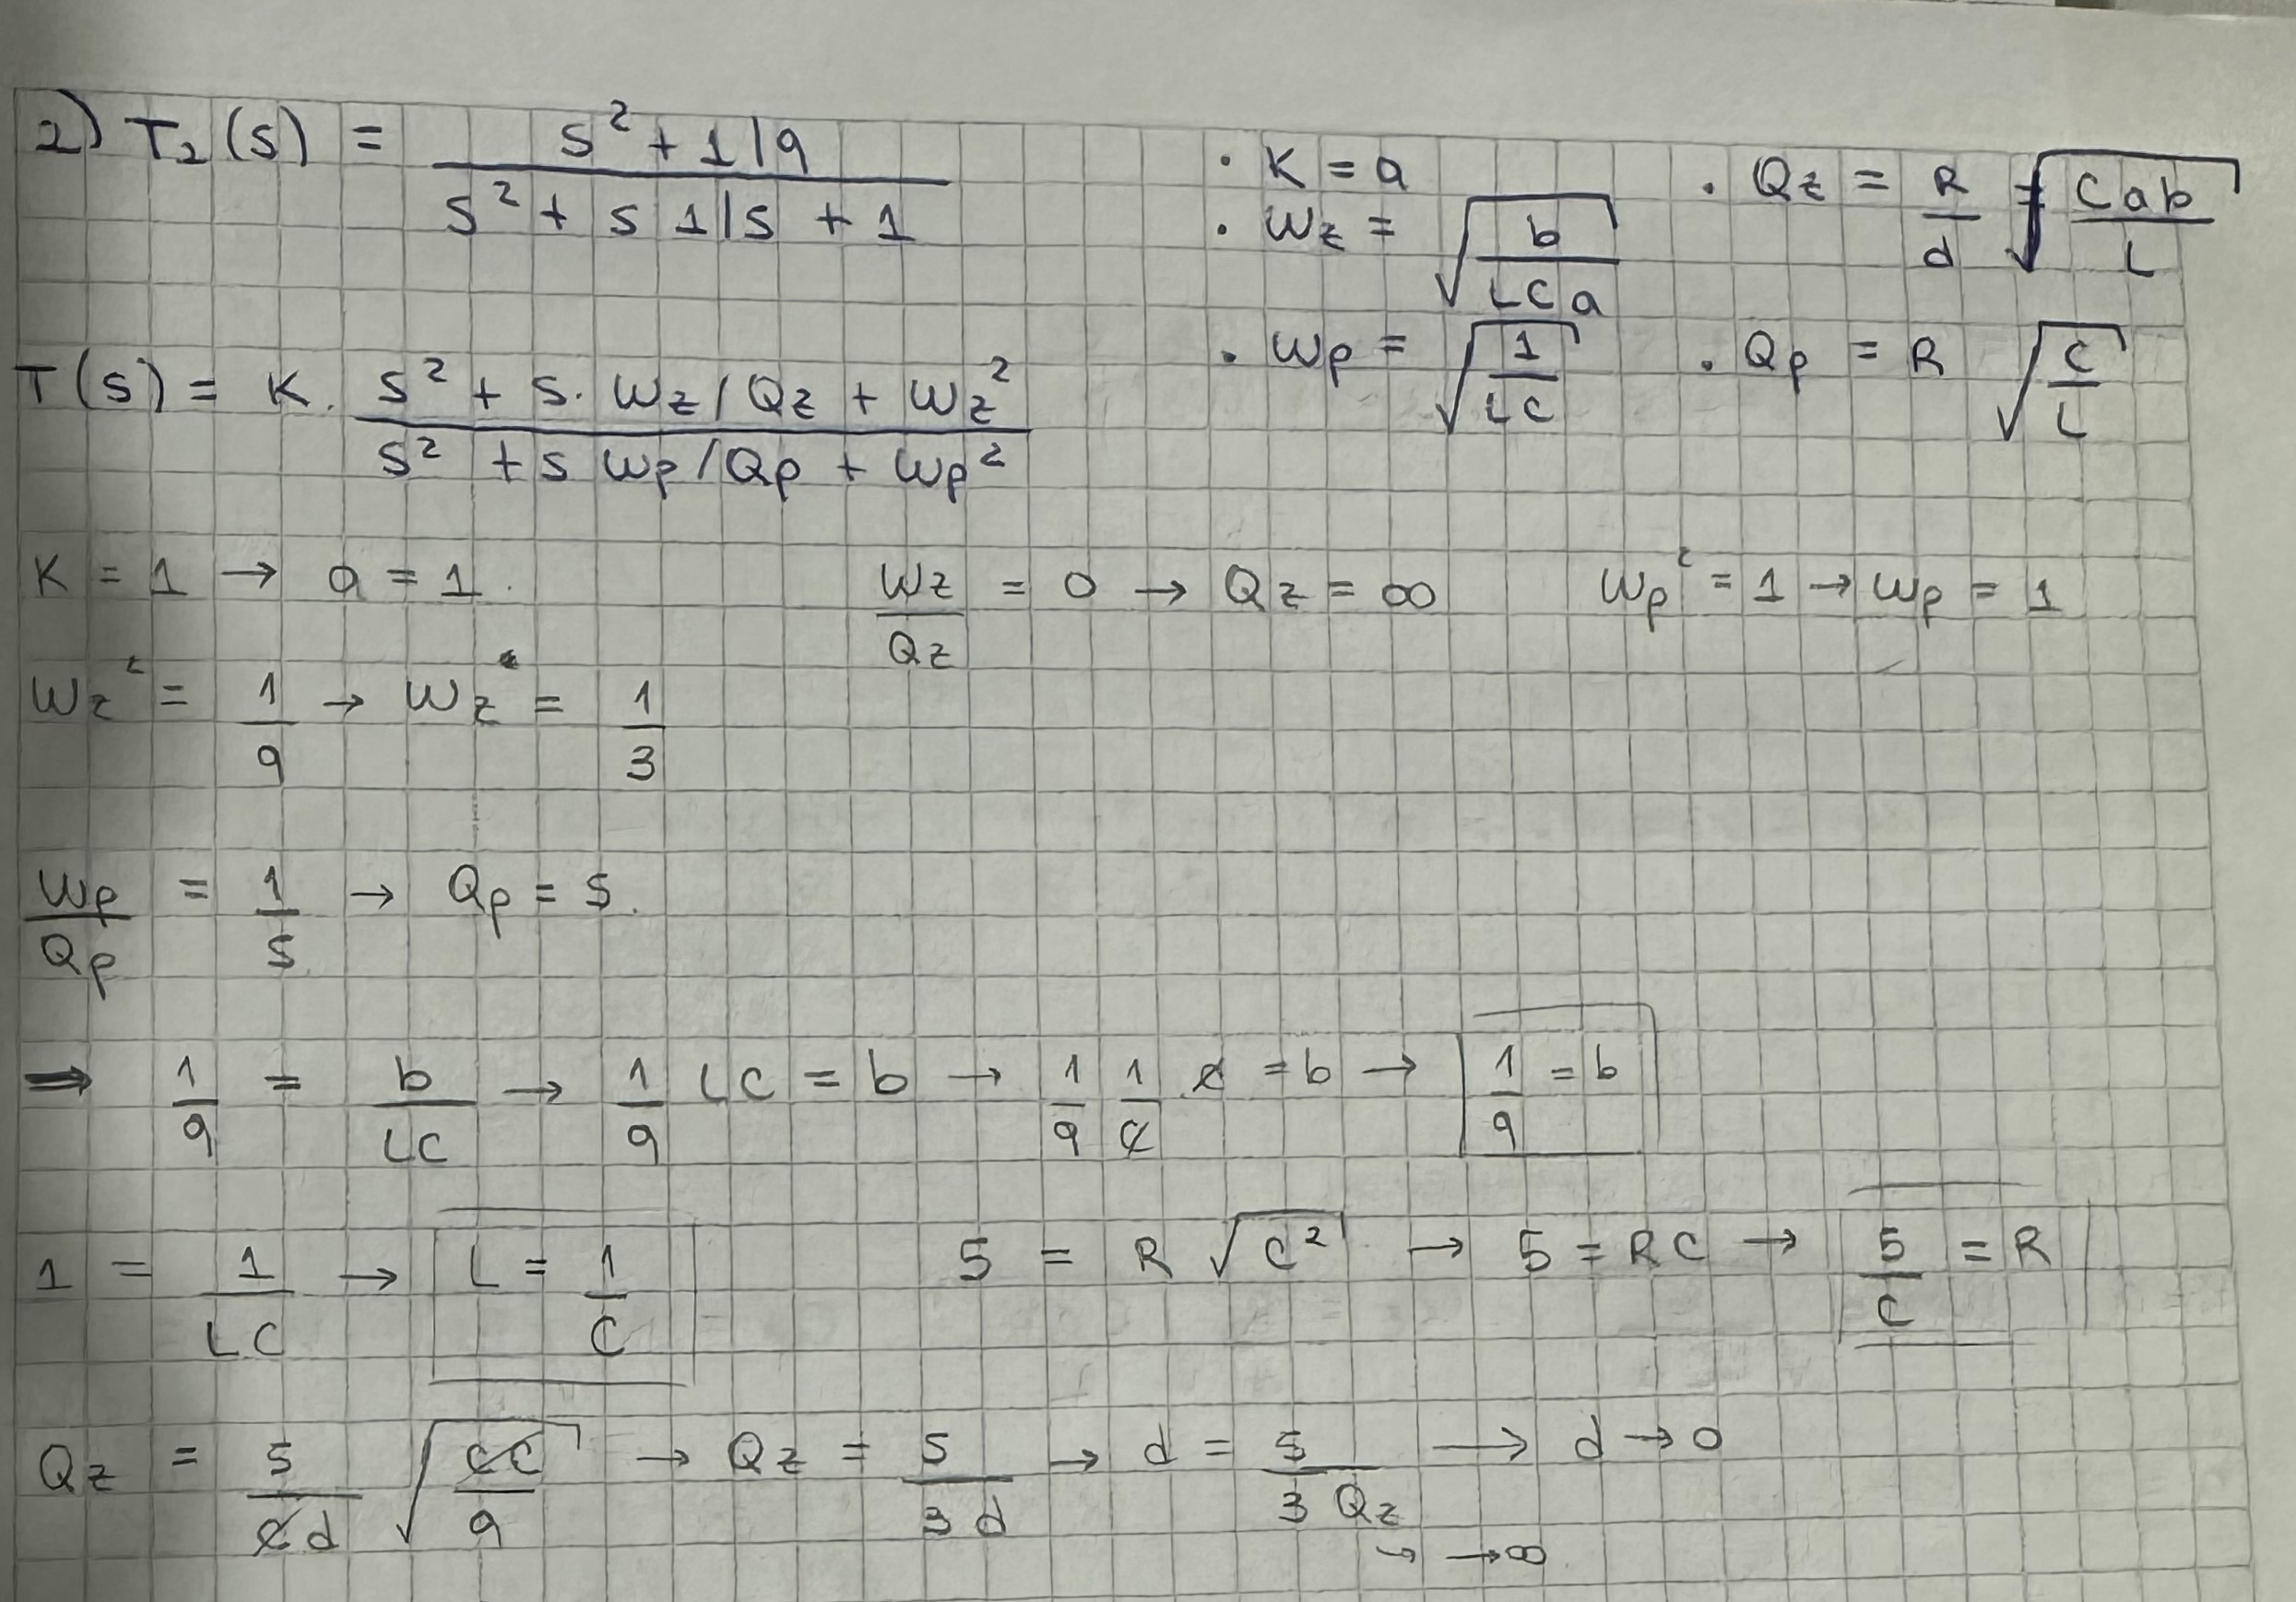

In [19]:
from IPython.display import Image, display
display(Image(filename="3_trans_2.jpeg"))

De donde se obtuvo:

- $a = 1$
  
- $b = \frac{1}{9}$
  
- $d = 0$

Por último para $T_3(s)$:

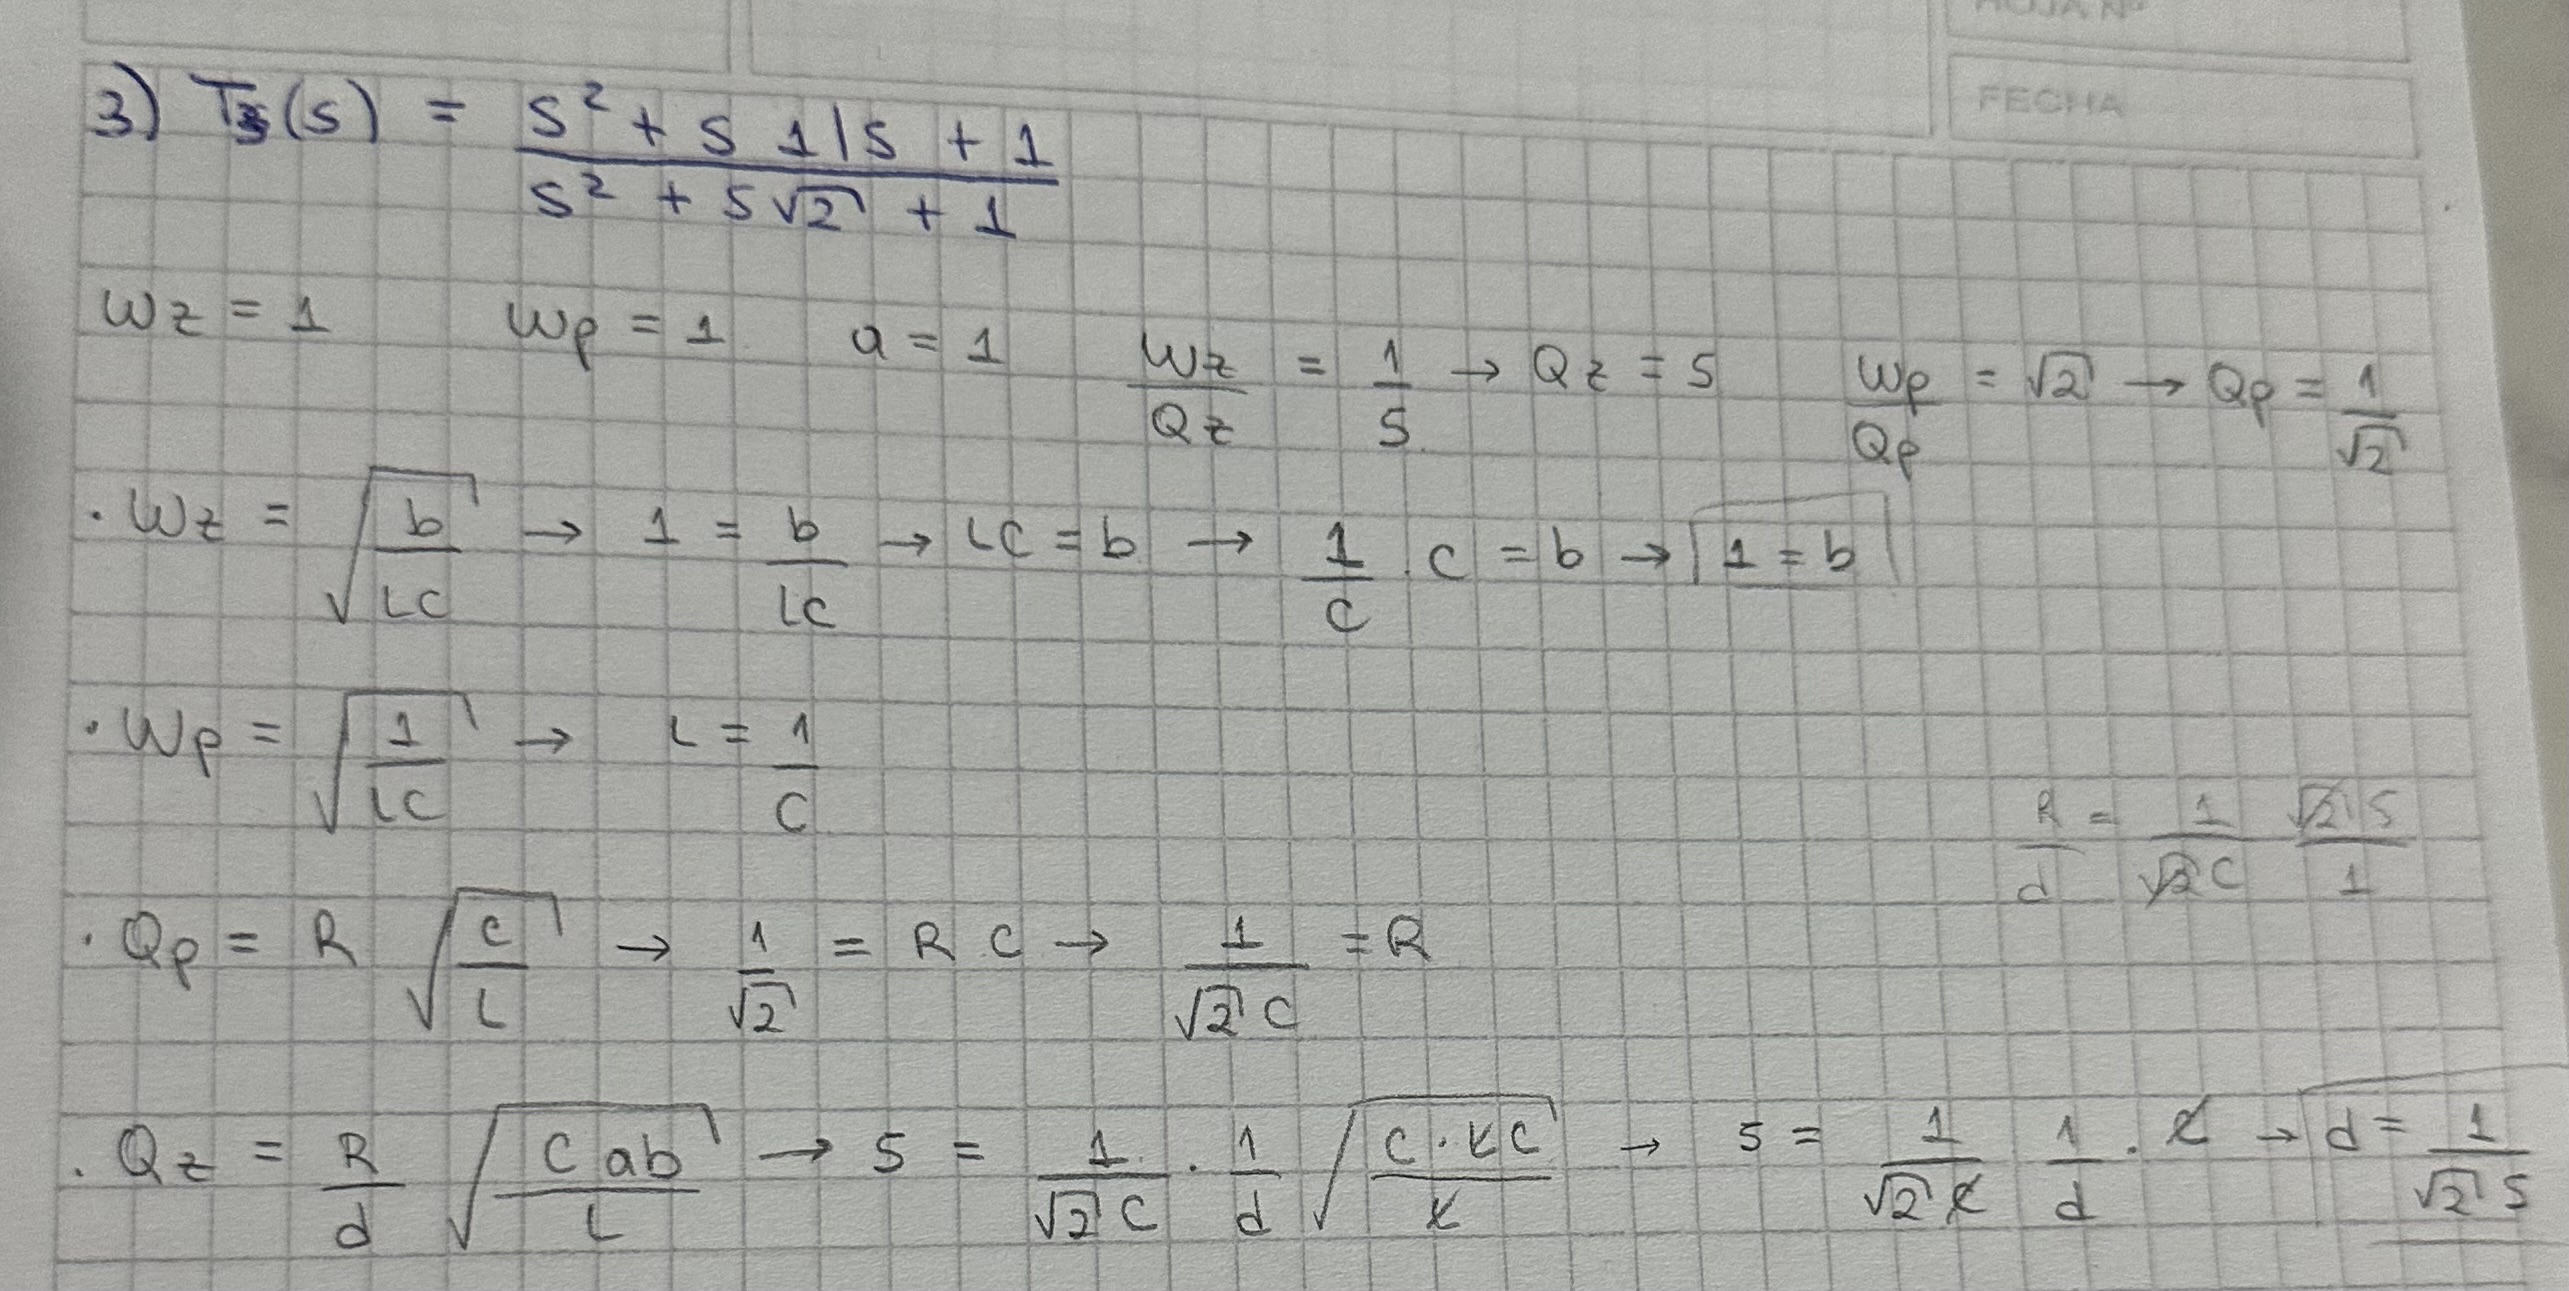

In [20]:
from IPython.display import Image, display
display(Image(filename="3_trans_3.jpeg"))

Donde se obtuvieron los siguientes valores: 

- $a = 1$
- $b = 1$
- $d = \frac{1}{5\sqrt{2}}$

A continuación para el punto 4 se calcularon y dibujaron en un diagrama de plano $s$ los polos y ceros para las respectivas redes bicuadráticas. Para la primera:

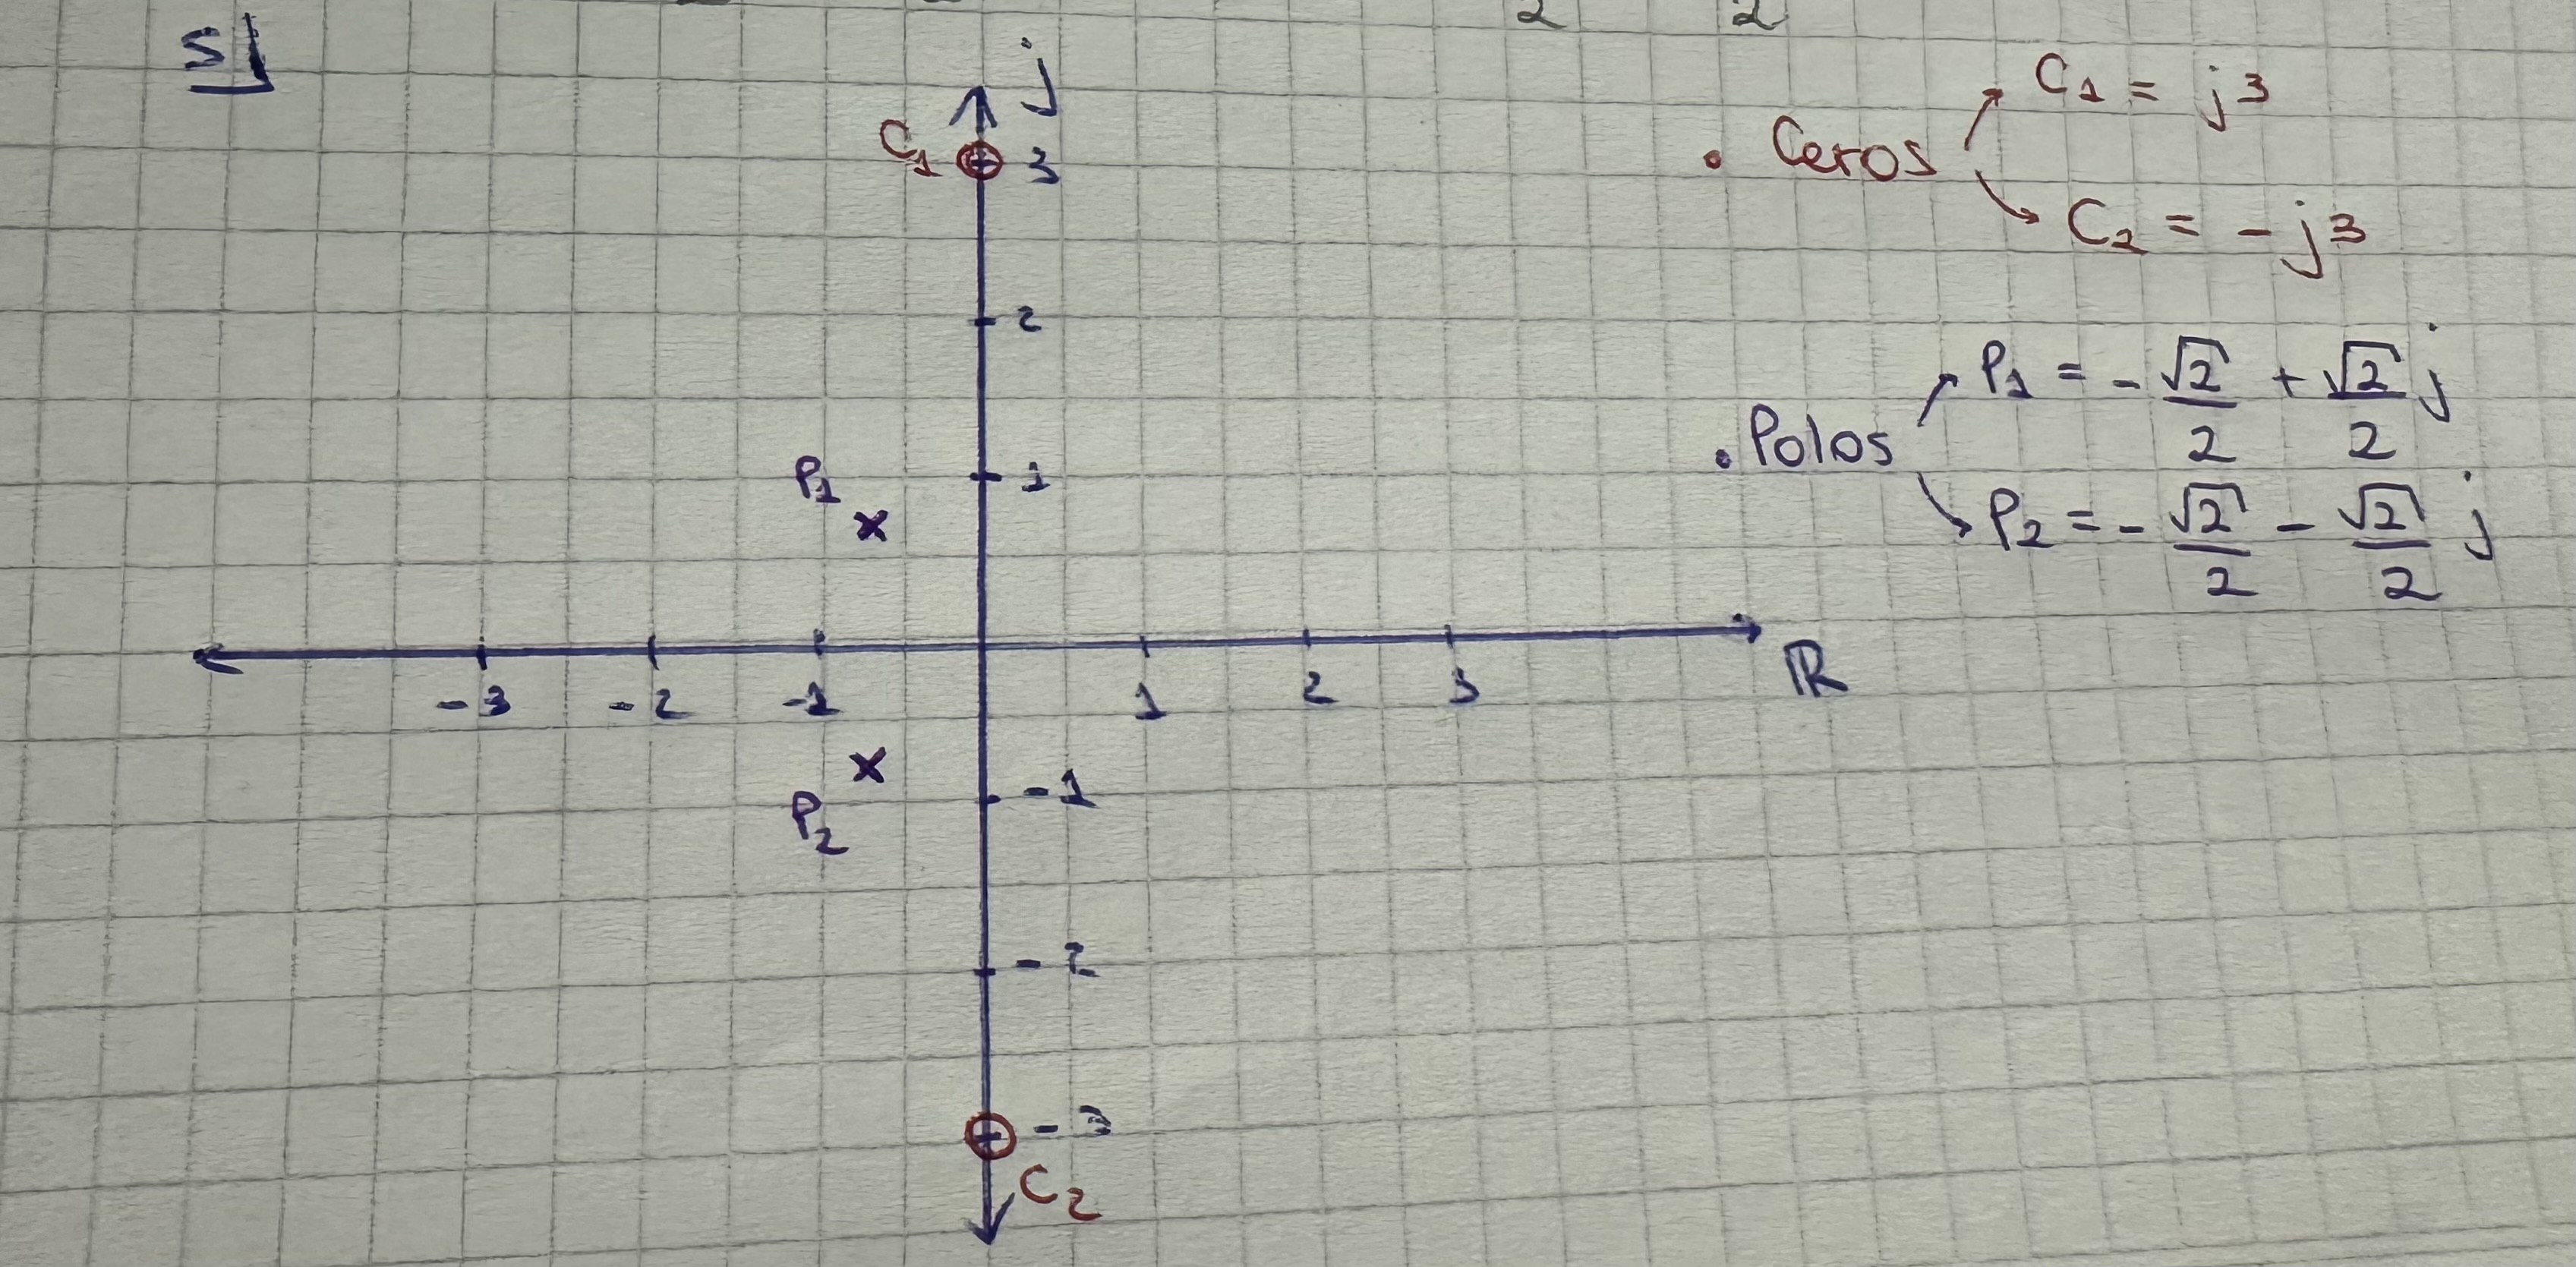

In [21]:
from IPython.display import Image, display
display(Image(filename="4_trans_1.jpeg"))

Como se observa en la figura, los ceros de esta red son: $C_1 = 3j$ y $C_2 = -3j$; y los polos: $P_1 = \frac{-2}{\sqrt{2}} + \frac{-2}{\sqrt{2}}j$ y $P_2 = \frac{-2}{\sqrt{2}} - \frac{-2}{\sqrt{2}}j$. 

Luego, para la segunda red bicuadrática se obtuvo: 

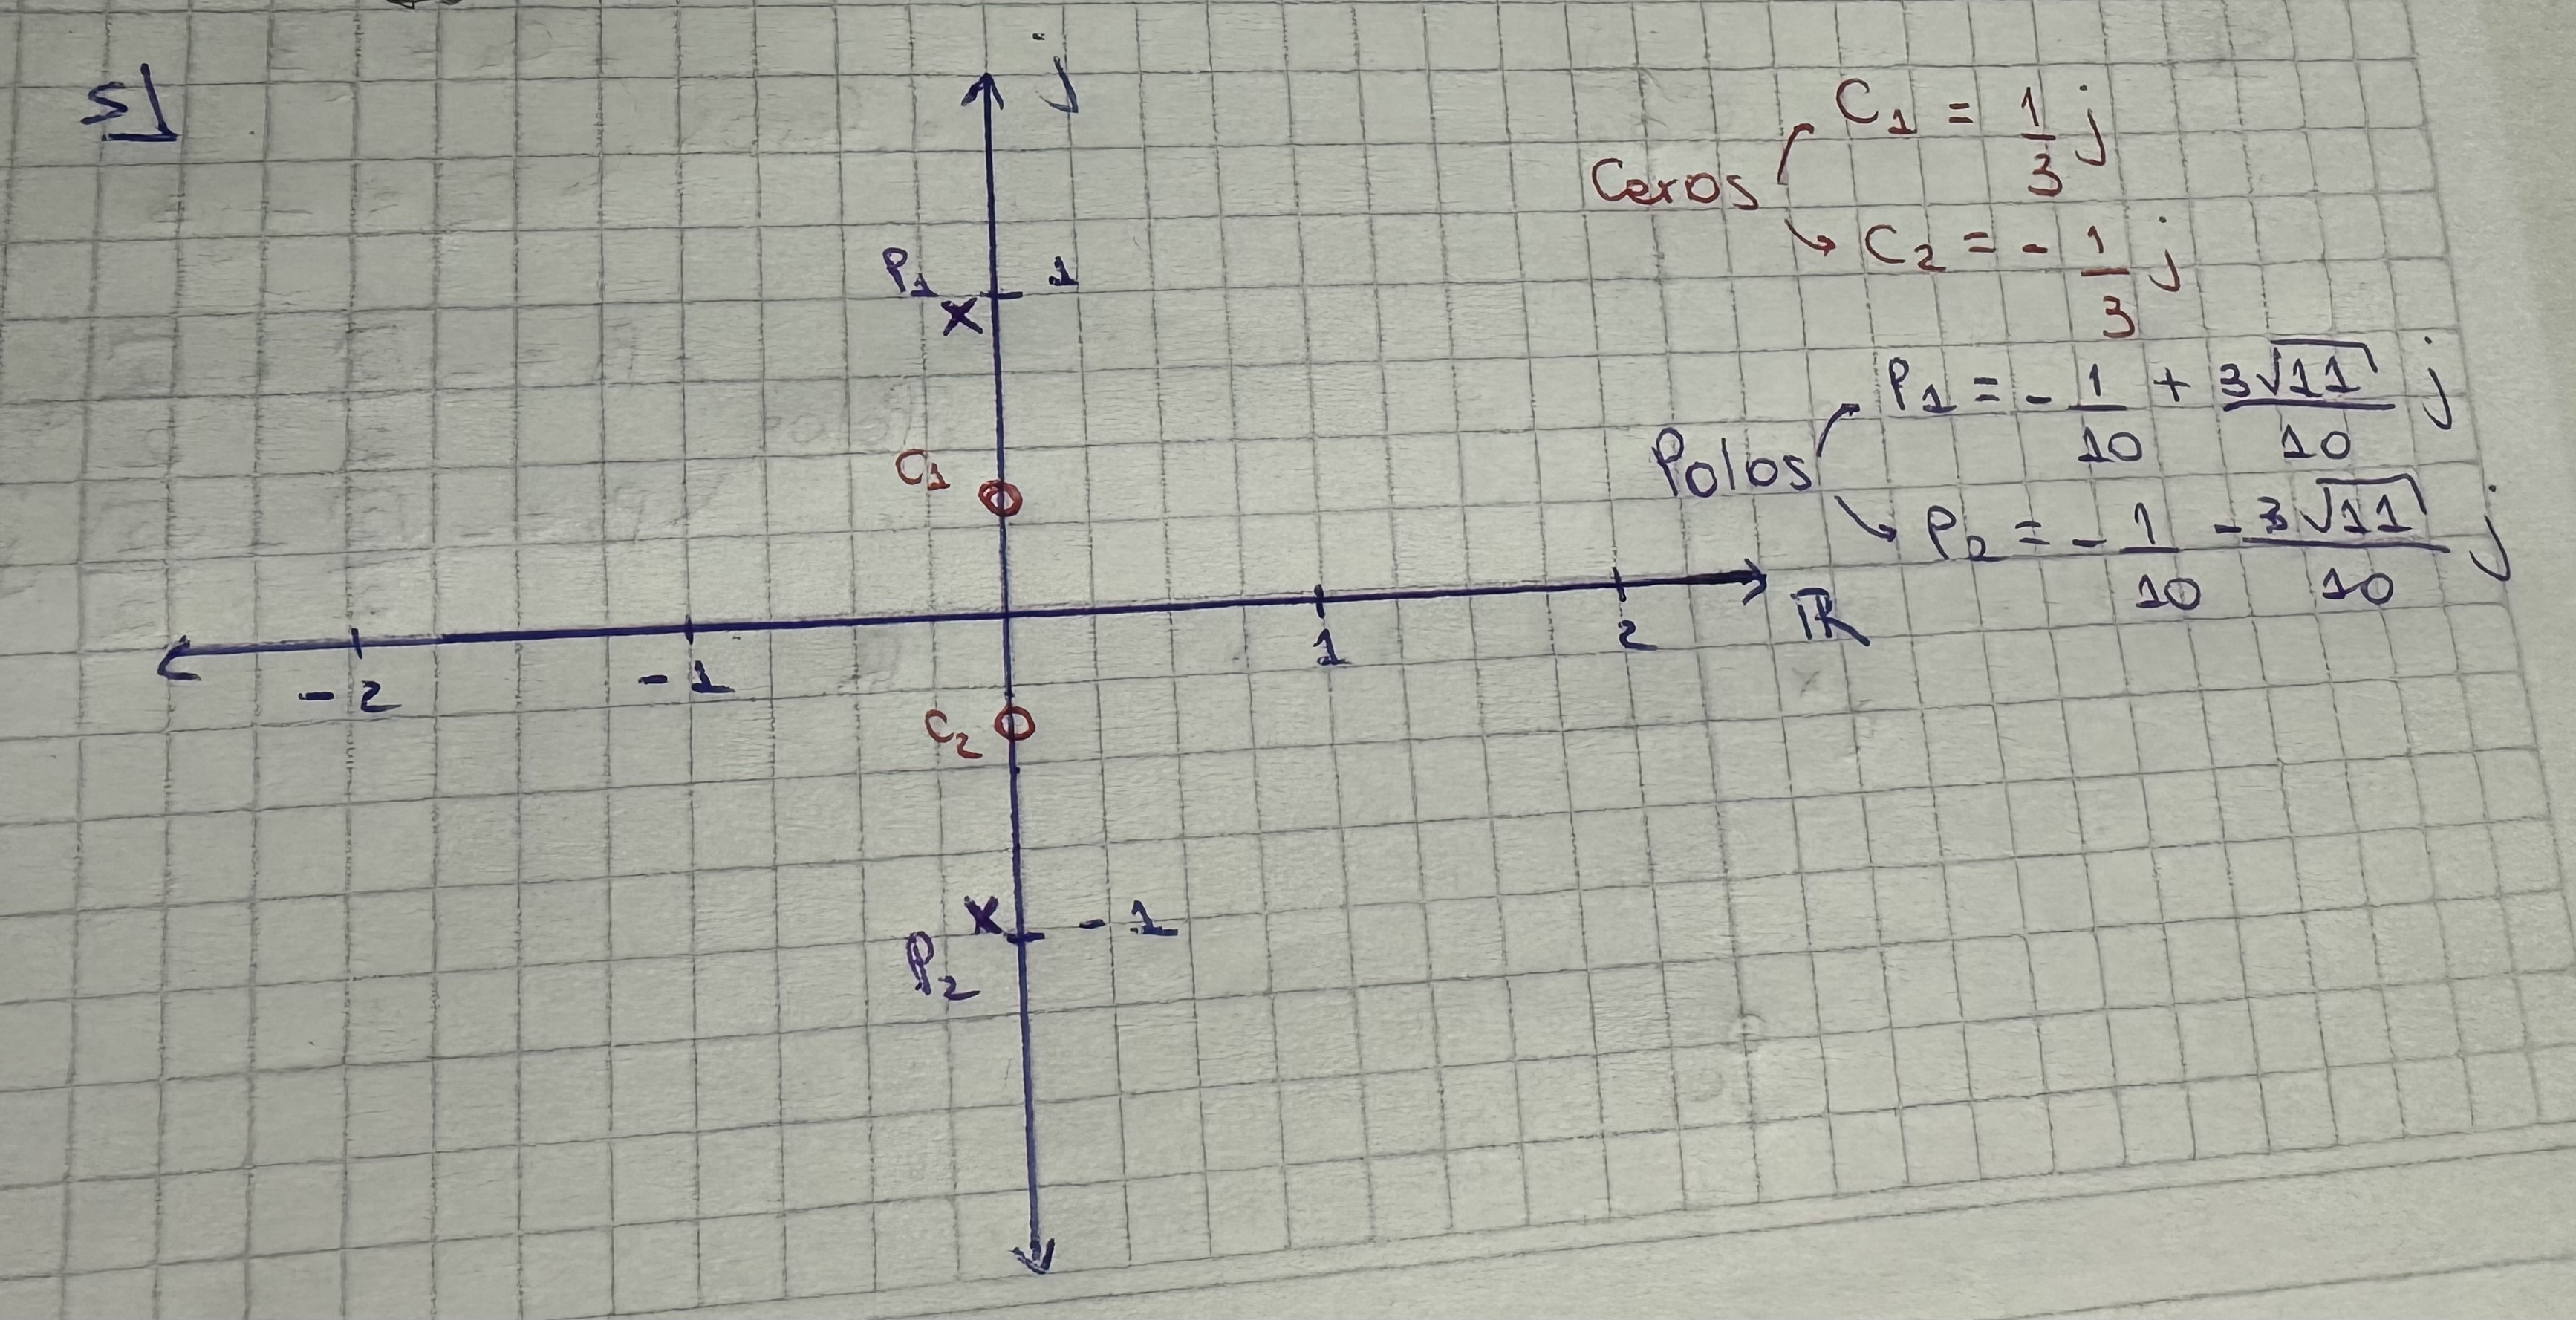

In [22]:
from IPython.display import Image, display
display(Image(filename="4_trans_2.jpeg"))

Para esta red se obtuvo como ceros: $C_1 = \frac{1}{3}j$ y $C_2 = \frac{-1}{3}j$, y polos: $P_1 = \frac{-1}{10} + \frac{3\sqrt{11}}{10}j$ y $P_2 = \frac{-1}{10} - \frac{3\sqrt{11}}{10}j$. 

Por último para la tercera red se obtuvo: 

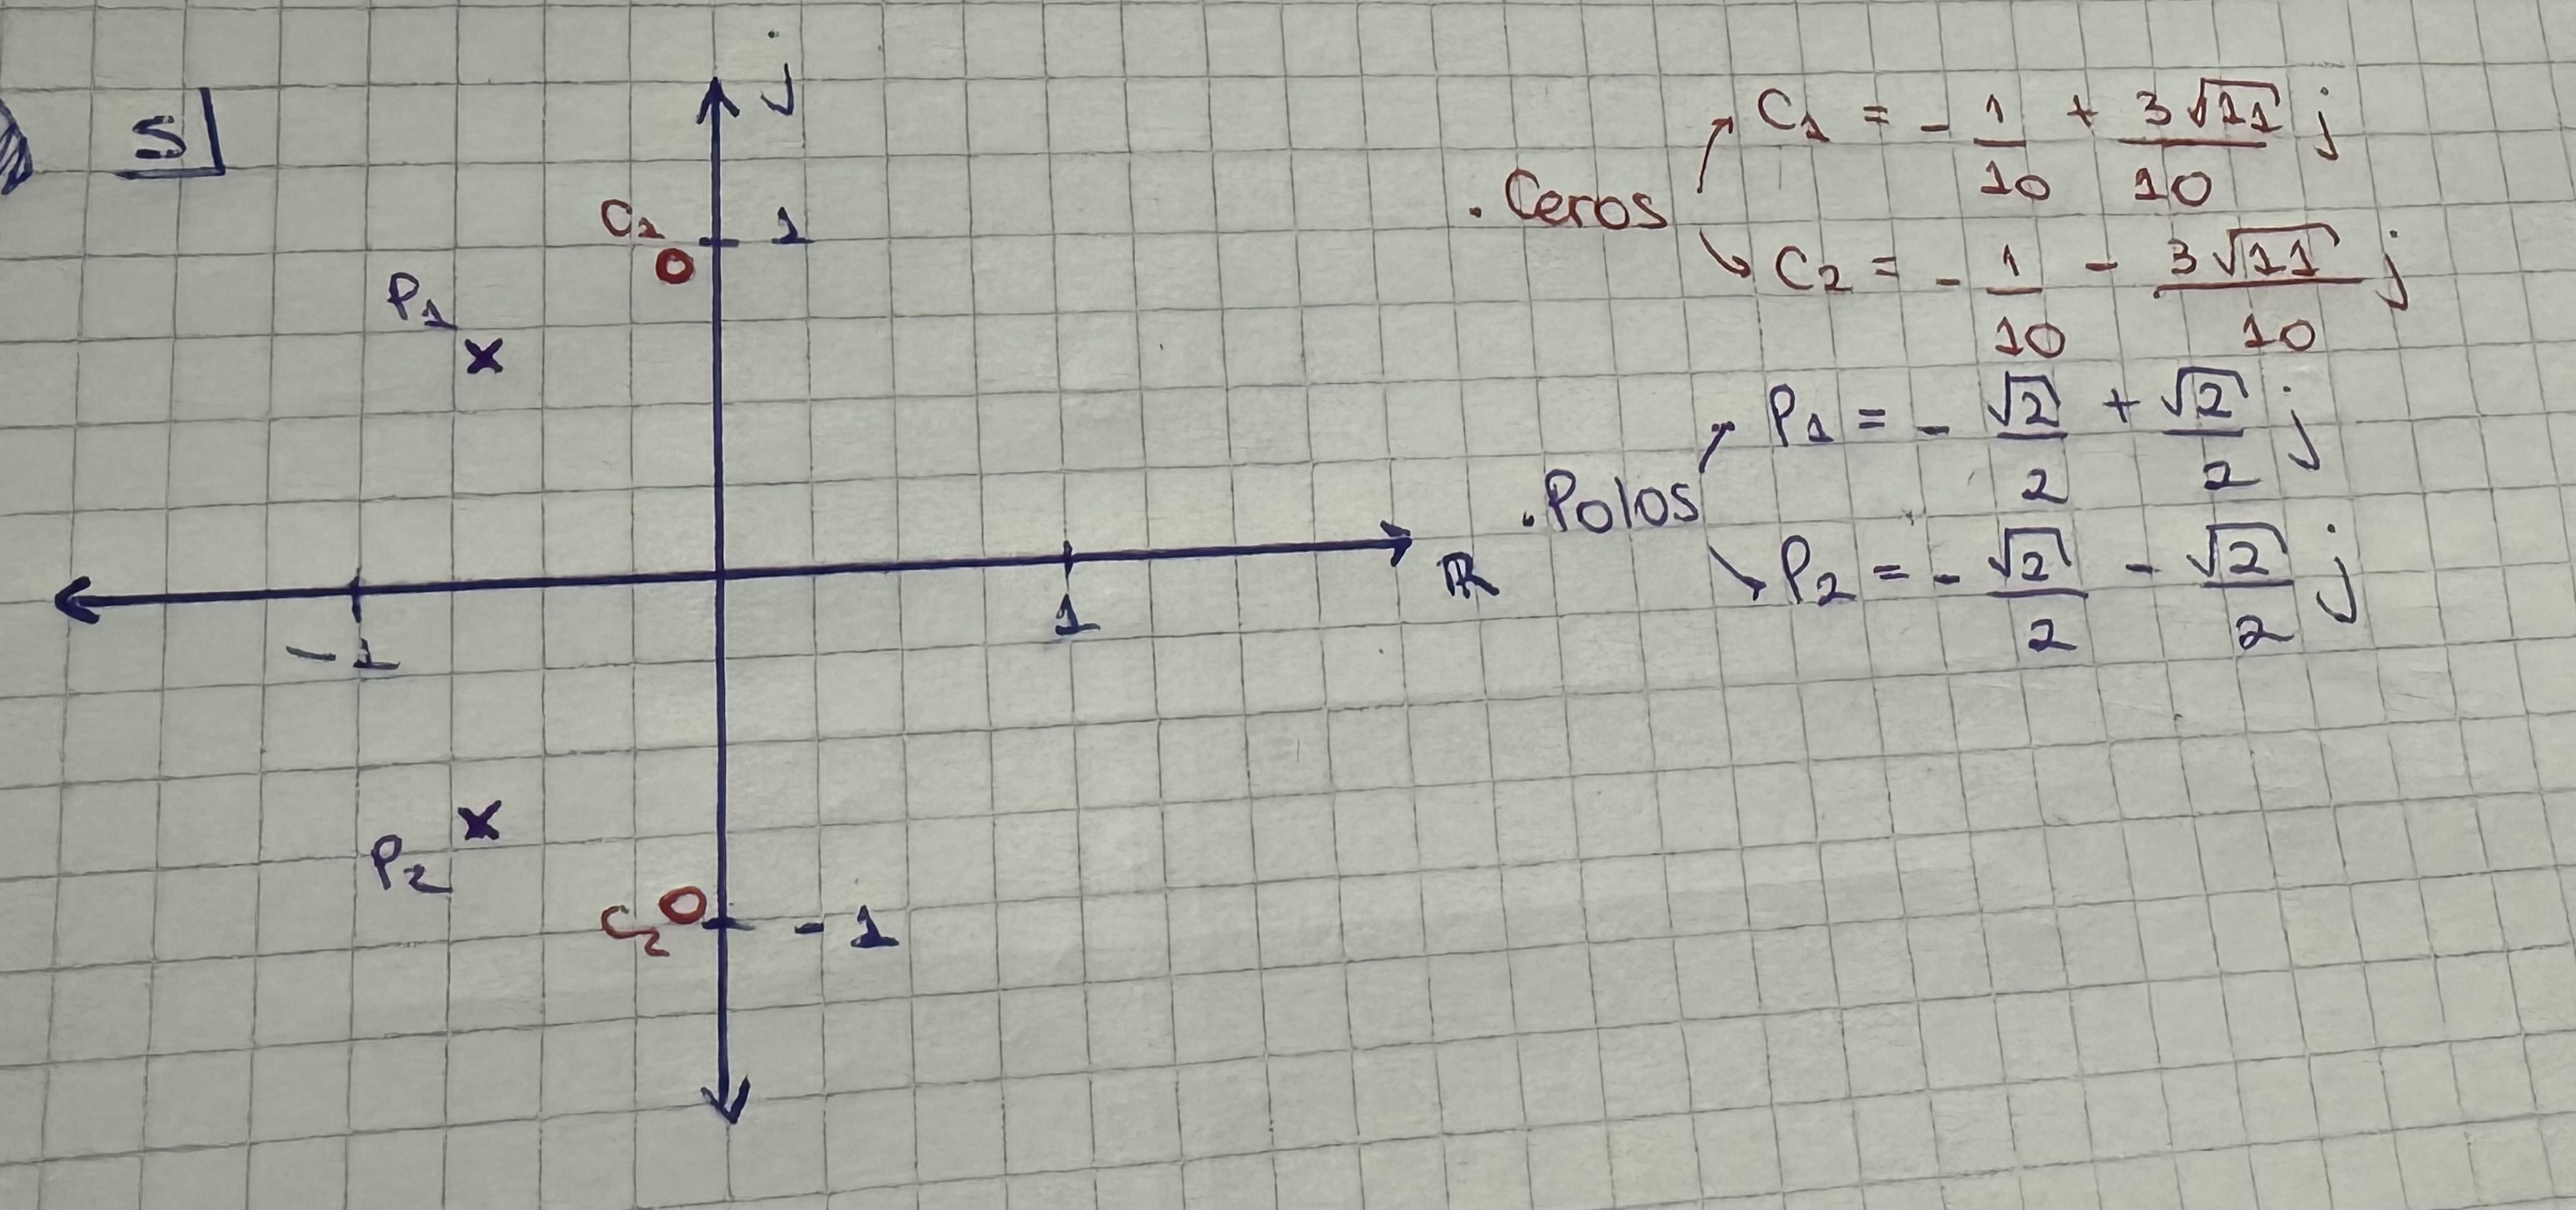

In [23]:
from IPython.display import Image, display
display(Image(filename="4_trans_3.jpeg"))

En este caso, como se observa en el gráfico, los ceros son: $C_1 = \frac{-1}{10} + \frac{3\sqrt{11}}{10}j$ y $C_2 = \frac{-1}{10} - \frac{3\sqrt{11}}{10}j$ y polos: $P_1 = \frac{-2}{\sqrt{2}} + \frac{-2}{\sqrt{2}}j$ y $P_2 = \frac{-2}{\sqrt{2}} - \frac{-2}{\sqrt{2}}j$.

## Bonus
Cuando dos sistemas lineales e invariantes en el tiempo (LTI) se conectan en cascada, la salida del primero se convierte en la entrada del segundo. Matemáticamente, si el primer sistema tiene una función de transferencia $T_1 (s)$ y el segundo $T_2 (s)$, la salida total será:
$$
T_{total}(s) = T_2 (s) \cdot T_1 (s)
$$

Esto ocurre porque en el dominio de Laplace la multiplicación de funciones de transferencia equivale a la convolución en el dominio temporal de las respuestas impulsivas de cada sistema. Es decir, aplicar los sistemas uno después del otro equivale a multiplicar sus funciones de transferencia.

Es importante remarcar que esta operación es válida siempre que los sistemas sean LTI y estén acoplados idealmente (sin interacción de impedancias entre etapas). En un contexto práctico de circuitos, esta condición se cumple si cada bloque tiene una etapa de aislamiento, por ejemplo, mediante un amplificador seguidor de tensión.

En este caso, se tienen dos sistemas:
- $T_1 (s) = \frac{s^2 + 9}{s^2 + s \sqrt{2} + 1}$
  
- $T_2 (s) = \frac{s^2 + \frac{1}{9}}{s^2 + s \frac{1}{5} + 1}$

Al conectarlos en cascada, la función de transferencia equivalente es el producto de ambas:
$$
T_{total}(s) = T_2 (s) \cdot T_1 (s) = \frac{(s^2 + 9)\left(s^2 +\frac{1}{9} \right)}{s^2 + s \sqrt{2} + 1) \left(s^2 + s \frac{1}{5} + 1 \right)}
$$

Si se desarrolla el numerador y el denominador:
$$
T_{\text{total}}(s) = 
\frac{s^4 + \dfrac{82}{9}s^2 + 1}
{s^4 + (\sqrt{2} + \tfrac{1}{5})s^3 + \left(2 + \tfrac{\sqrt{2}}{5}\right)s^2 + (\sqrt{2} + \tfrac{1}{5})s + 1}
$$


Cada función de transferencia individual ($T_1$ y $T_2$​) corresponde a un filtro de segundo orden o sección bicuadrática. Al conectarlas en cascada, el sistema total se convierte en un filtro de cuarto orden, cuya respuesta en frecuencia es el producto de las respuestas de cada etapa.

Por lo tanto, los ceros de $T_{total} (s)$ son la unión de los ceros de $T_1 (s)$ y $T_2 (s)$. De la misma forma, los polos son la unión de los polos de ambas funciones y la magnitud total de la respuesta en frecuencia es el producto de las magnitudes individuales:
$$
|T_{total} (j \omega)| = |T_1 (j \omega)| \cdot |T_2 (j \omega)|
$$

Esto permite diseñar respuestas más selectivas o específicas (por ejemplo, aumentar el orden de un filtro pasa-bajos, pasa-banda o rechaza-banda).


## Conclusión
El análisis realizado permitió caracterizar completamente el circuito propuesto en el dominio de Laplace, obteniendo la función de transferencia general y parametrizando sus componentes a través de los valores $a$, $b$ y $d$. A partir de esta parametrización, se determinaron los polos y ceros de cada sección bicuadrática, lo que permitió identificar con precisión las frecuencias características y factores de calidad de cada red.

Los resultados muestran que las secciones $T_1(s)$, $T_2(s)$ y $T_3(s)$ presentan polos y ceros distribuidos de manera que se puede controlar la respuesta en frecuencia de cada filtro de segundo orden. La conexión en cascada de estas secciones condujo a un sistema de cuarto orden, cuyos polos y ceros son la combinación de los de las secciones individuales, demostrando que la modularidad de las redes bicuadráticas permite diseñar filtros más complejos de manera predecible y controlada.

En conjunto, este trabajo no solo permitió aplicar herramientas de análisis de circuitos y teoría de sistemas LTI, sino que también produjo resultados concretos que reflejan cómo los parámetros del circuito afectan la ubicación de polos y ceros y, por ende, la respuesta en frecuencia. Esto evidencia la utilidad de la metodología empleada tanto para el diseño como para la predicción del comportamiento de filtros eléctricos.

## Autoevaluación del aprendizaje

A través de el desarrollo de este trabajo, consideramos que pudimos consolidar varios aspectos clave del análisis de circuitos y del diseño de filtros. Pudimos comprender cómo la descomposición de un circuito en ramas y el uso de admitancias e impedancias permite determinar su función de transferencia de manera sistemática.

La parametrización de la función de transferencia y la identificación de polos y ceros nos permitió relacionar directamente los valores de los componentes con la respuesta en frecuencia del sistema, fortaleciendo nuestra capacidad para interpretar resultados concretos y no solo realizar cálculos. Asimismo, la práctica con redes bicuadráticas y la conexión en cascada de sistemas mostró cómo se puede modular y controlar la respuesta de filtros de mayor orden, consolidando la comprensión de sistemas LTI y la relación entre dominio de Laplace y comportamiento en frecuencia.

Con el objetivo de profundizar en los contenidos teóricos recurrimos a la bibliografía recomendada (*Thomas Holton - Digital Signal Processing*). Utilizamos ChatGPT para algunos comandos de LaTex, de Jupyter Notebook y para reforzar los contenidos teóricos.